[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/estocasticos-udem/curso_2023-1/blob/main/variables_aleatorias/geometrica.ipynb)

In [23]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Distribución geometrica

## Ejemplo 1 - Juego del día del cumpleaños

En una clase, su profesor planea darte 10 problemas como tarea. Sin embargo, desea negociar la tarea para la cual propone a sus estudiantes jugar el juego del cumpleaños, el cual funciona así:
1. El profesor seleccionará un estudiante al azar de su clase y le pedirá a un estudiante elegido al azar, que adivine el día de la semana (por ejemplo, jueves) en el que nació uno de los amigos del profesor. 
2. Si el estudiante adivina correctamente, entonces la clase tendrá un solo problema de tarea. 
3. Si el estudiante adivina el día de la semana equivocado, el profesor volverá a seleccionar al azar a otro estudiante de la clase. El alumno elegido intentará adivinar el día de la semana en el que nació otro amigo del profesor. Si este estudiante lo hace bien, la clase tendrá dos problemas de tarea. 
4. El juego continúa hasta que un alumno acierta correctamente el día en que nació uno de los (muchos) amigos del profesor. 

Su maestro le asignará una cantidad de problemas de tarea que es igual a la cantidad total de conjeturas realizadas por los miembros de su clase. 

Este es un experimento geométrico, en el cual la VA $Y$ es el número de intentos para obtener hasta que se adivina correctamente el día que el amigo seleccionado por el profesor cumple años. De modo que $X \sim Geom(p)$
* $p = \frac{1}{7}$
* $p = 1 - p = 1- \frac{1}{7} = \frac{6}{7}$

Inicialmente teniendo en cuenta esto, vamos a definir la variable aleatoria geometrica.

In [24]:
"""
Definición de la VA binomial: Y ~ Geom(p)

Y: Número de intentos para obtener hasta que se adivina correctamente el día que 
   el amigo seleccionado por el profesor cumple años

Parametros:
- p: 1/7
- q: 6/7
"""
p = 1/7
Y = stats.geom(p = 1/7)

Si se supone que el profesor tiene un total de 25 problemas por asignar a la clase.

1. ¿Cuál es la probabilidad de que el primer estudiante adivine correctamente?
   
   Se nos pide $P(Y = 1)$:

In [25]:
# P(Y = 3)
p_1 = Y.pmf(1)
print("P(Y=3) = {0:0.5f}".format(p_1))

P(Y=3) = 0.14286


2. ¿Cuál es la probabilidad de que le pongan a la clase dos problemas de tarea?

   Se nos pide $P(Y = 2)$:

In [26]:
# P(Y = 2)
p_2 = Y.pmf(2)
print("P(Y=2) = {0:0.5f}".format(p_2))

P(Y=2) = 0.12245


3. ¿Cuál es la probabilidad de que el tercer estudiante sea el que adivine?
   
    Se nos pide $P(Y = 3)$:

In [27]:
# P(Y = 3)
p_3 = Y.pmf(3)
print("P(Y=3) = {0:0.5f}".format(p_3))

P(Y=3) = 0.10496


4. Encuentre la probabilidad de que la clase tenga que hacer como tarea 10 problemas.
   
   Se nos pide $P(Y = 10)$:

In [28]:
# P(Y = 10)
p_10 = Y.pmf(10)
print("P(Y = 10) = {0:0.5f}".format(p_10))

P(Y = 10) = 0.03568


5. Encuentre $P(Y < 10)$ e interprete el valor en este contexto

In [29]:
# Forma 1
p_m10f1 = sum(Y.pmf(np.arange(10)))
print("Forma 1 -> P(Y < 10) = {0:0.5f}".format(p_m10f1))

# Forma 2
p_m10f2 = Y.cdf(9)
print("Forma 1 -> P(Y < 10) = {0:0.5f}".format(p_m10f2))

Forma 1 -> P(Y < 10) = 0.75027
Forma 1 -> P(Y < 10) = 0.75027


6. Obtenga la media, la varianza y la desviación estandar.

In [30]:
[E,V] = Y.stats(moments='mv')  # E = Y.mean()      
                               # V = Y.var()

S = Y.std()      # V = stats.geom(p = 1/7)

print("- Media: E(X) = {0:2f}".format(E))
print("- Varianza: Var(X) = {0:2f}".format(V))
print("- Desv. estandar: sd(X) = {0:2f}".format(S))

- Media: E(X) = 7.000000
- Varianza: Var(X) = 42.000000
- Desv. estandar: sd(X) = 6.480741


7. Grafique la PFM

In [31]:
puntos = 25
y = list(range(1,puntos + 1))
pmf = Y.pmf(y)
df = pd.DataFrame({"y": y,"pmf": pmf},columns=["y","pmf"])
df

,y,pmf
0,1,0.142857
1,2,0.122449
2,3,0.104956
3,4,0.089963
4,5,0.077111
5,6,0.066095
6,7,0.056653
7,8,0.048560
8,9,0.041622
9,10,0.035676


Text(0, 0.5, 'Probabilidad')

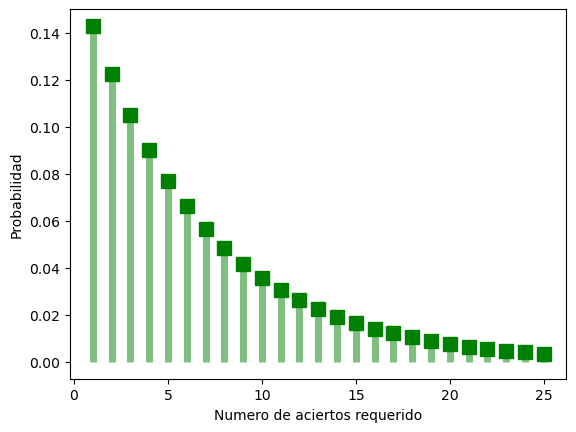

In [32]:
# Grafica
plt.plot(y, pmf, 'gs', ms=10)
plt.vlines(y, 0, pmf, colors='g', lw = 5, alpha=0.5)
plt.xlabel("Numero de aciertos requerido")
plt.ylabel("Probabilidad")

7. Grafique la CDF

In [33]:
puntos = 25
y = list(range(1,puntos + 1))
cdf = Y.cdf(y)
df2 = pd.DataFrame({"y": y,"cdf": cdf},columns=["y","cdf"])
df2

,y,cdf
0,1,0.142857
1,2,0.265306
2,3,0.370262
3,4,0.460225
4,5,0.537336
5,6,0.603431
6,7,0.660083
7,8,0.708643
8,9,0.750265
9,10,0.785942


Text(0, 0.5, 'CFD')

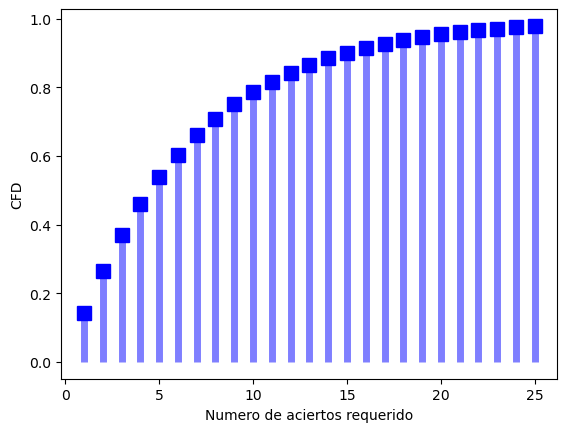

In [34]:
# Grafica
plt.plot(y, cdf, 'bs', ms=10)
plt.vlines(y, 0, cdf, colors='b', lw = 5, alpha=0.5)
plt.xlabel("Numero de aciertos requerido")
plt.ylabel("CFD")